In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet as wn
import pickle
import fasttext
import random
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models.fasttext import FastText
from nltk.stem import WordNetLemmatizer

### Democrats

In [24]:
comm = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/dem/dem_comments.csv')
fr = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/dem/dem_friends.csv')
dem = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/dem/dem.csv')

In [32]:
txt = [[i for i in dem.title] 
+ [i for i in dem.body] 
+ [i for i in fr.title] 
+ [i for i in fr.body] 
+ [i for i in comm.body]]

txt = txt[0]

txt = [str(i) for i in txt]

- preprocessing (to be decided)

In [26]:
stemmer = WordNetLemmatizer()
en_stop = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(document):
        # Remove all the special characters
        document= re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [52]:
sent = [preprocess_text(sent) for sent in txt]

In [55]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
#word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(x) for x in txt] not_preprocessed
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(x) for x in sent] #preprocessed

- model (parameter optimization needed)

In [56]:
embedding_size = 100
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model = FastText(word_tokenized_corpus,  size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1)

- Visualization

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


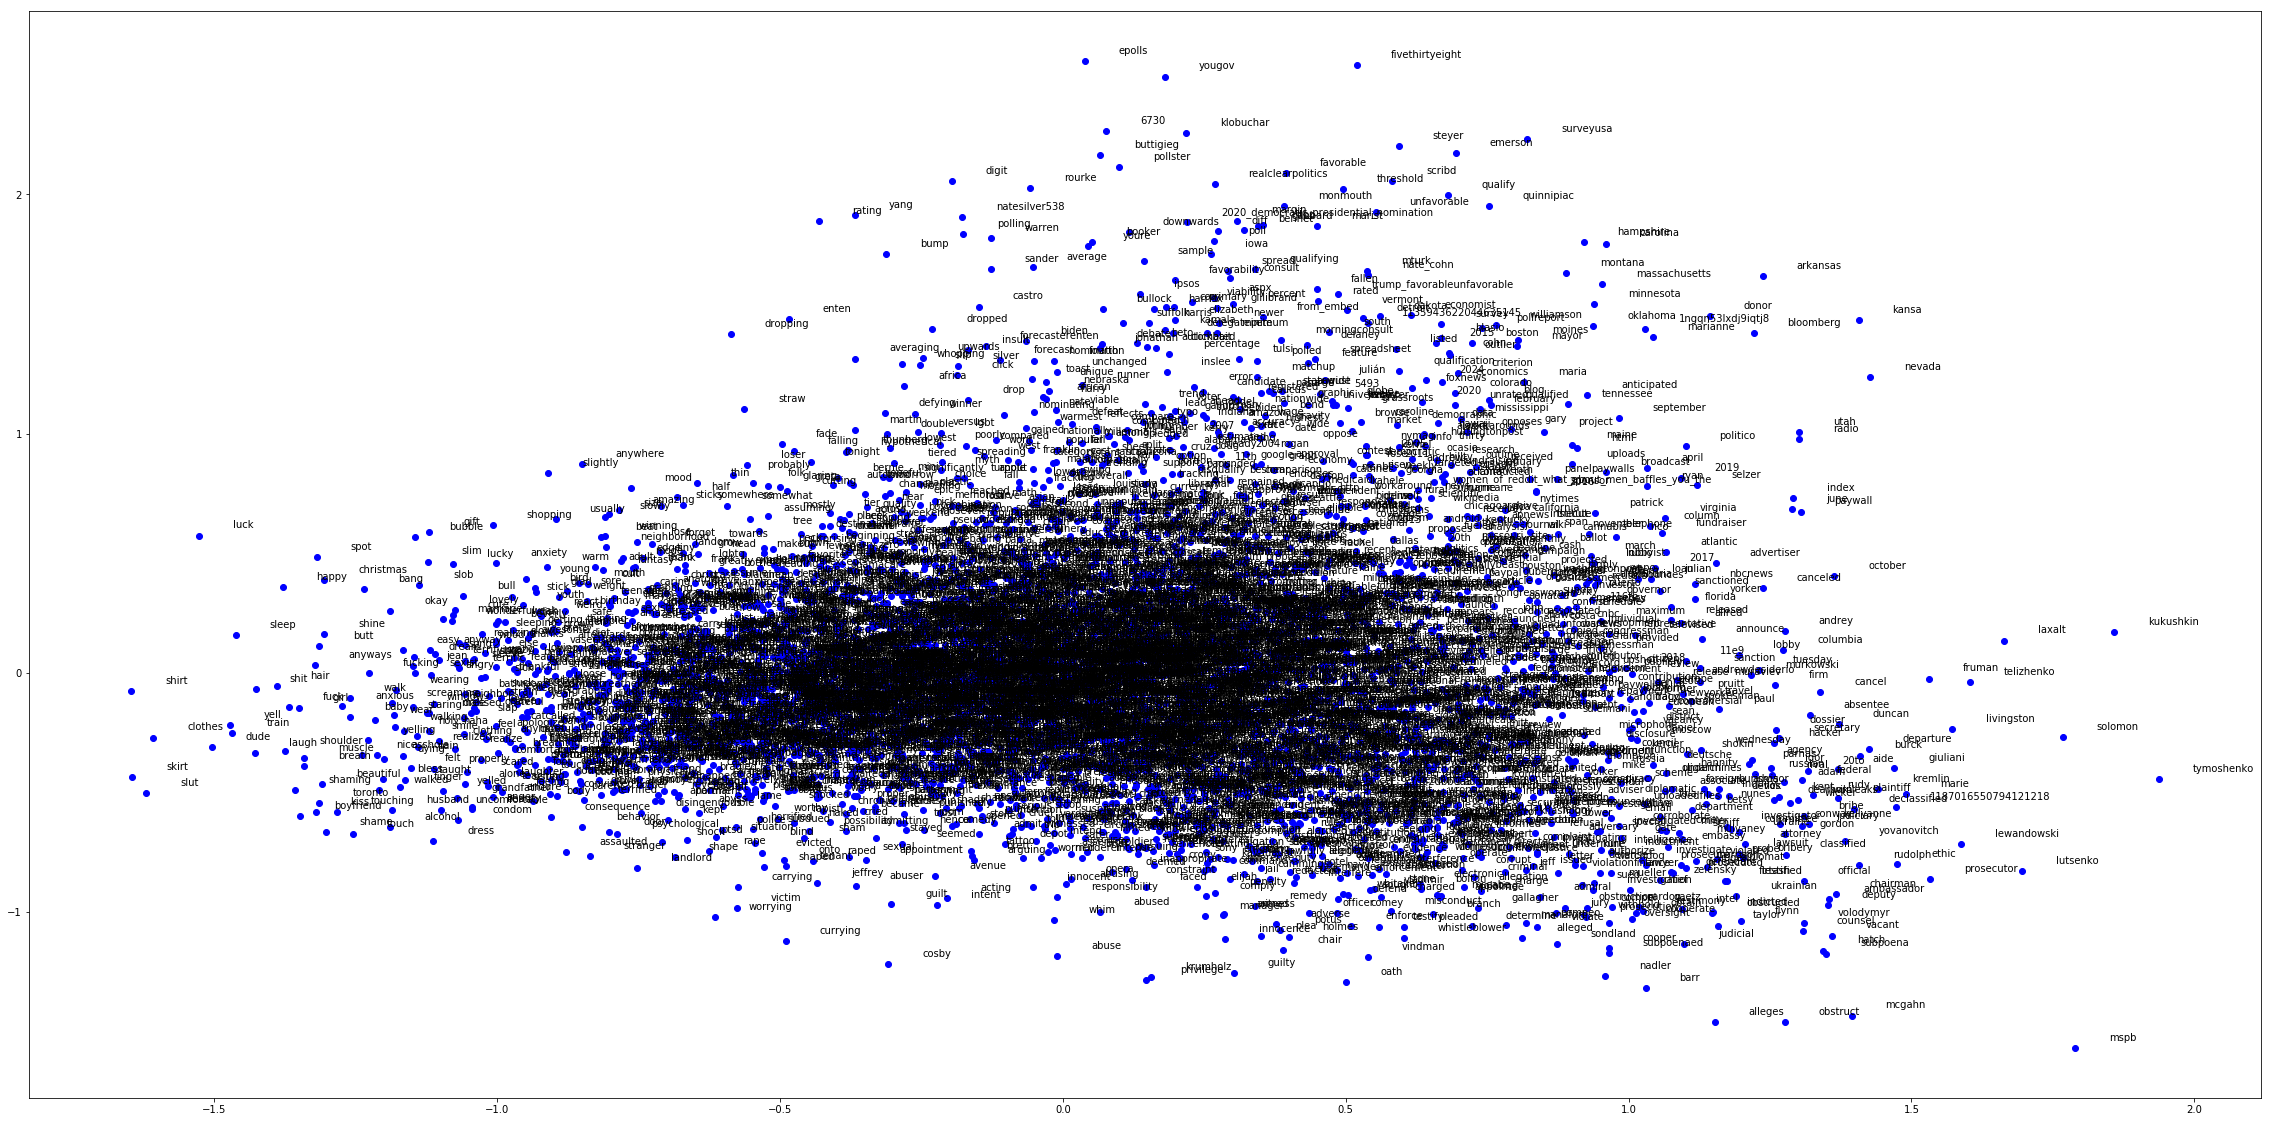

In [57]:
lista = []
for key,val in ft_model.wv.vocab.items():
    lista.append(key)

#random150 = random.choices(lista, k=150)

vec = [ft_model[i] for i in lista]

word_vectors = vec

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = lista

plt.figure(figsize=(40, 20))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='blue')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')
    
#plt.savefig('dem.png')

- playing with similarities


In [58]:
concepts = ['immigration', 'muslim', 'environment', 'greta', 'democracy']
for i in concepts:
    print(i, ft_model.wv.most_similar(i, topn=10), '\n')

immigration [('immigrant', 0.8882216215133667), ('muslim', 0.8799687623977661), ('declaration', 0.8767966032028198), ('nationalist', 0.8492964506149292), ('separation', 0.8421580791473389), ('demonstration', 0.8406047224998474), ('stephen', 0.8389654159545898), ('rhetoric', 0.8351844549179077), ('extremism', 0.835033655166626), ('alarm', 0.8287854194641113)] 

muslim [('immigrant', 0.8928669691085815), ('extremism', 0.8913196921348572), ('fascist', 0.8862619400024414), ('immigration', 0.8799687623977661), ('rhetoric', 0.8754594326019287), ('supremacist', 0.8691762685775757), ('racist', 0.8683972954750061), ('fundamentalist', 0.8671077489852905), ('extremist', 0.8656756281852722), ('musk', 0.8607457876205444)] 

environment [('environmental', 0.9723694324493408), ('environmentalist', 0.9304099082946777), ('endangered', 0.8402213454246521), ('exchange', 0.8330938816070557), ('carbon', 0.8299117088317871), ('agreement', 0.8289004564285278), ('industry', 0.8248364925384521), ('disagreement

Rep

In [59]:
comm = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/rep/rep_comments.csv')
fr = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/rep/rep_friends.csv')
dem = pd.read_csv('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/political/rep/rep.csv')

txt = [[i for i in dem.title] 
+ [i for i in dem.body] 
+ [i for i in fr.title] 
+ [i for i in fr.body] 
+ [i for i in comm.body]]

txt = txt[0]

txt = [str(i) for i in txt]

stemmer = WordNetLemmatizer()
en_stop = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

sent = [preprocess_text(sent) for sent in txt]

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
#word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(x) for x in txt] not_preprocessed
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(x) for x in sent] #preprocessed

In [60]:
embedding_size = 100
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model = FastText(word_tokenized_corpus,  size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


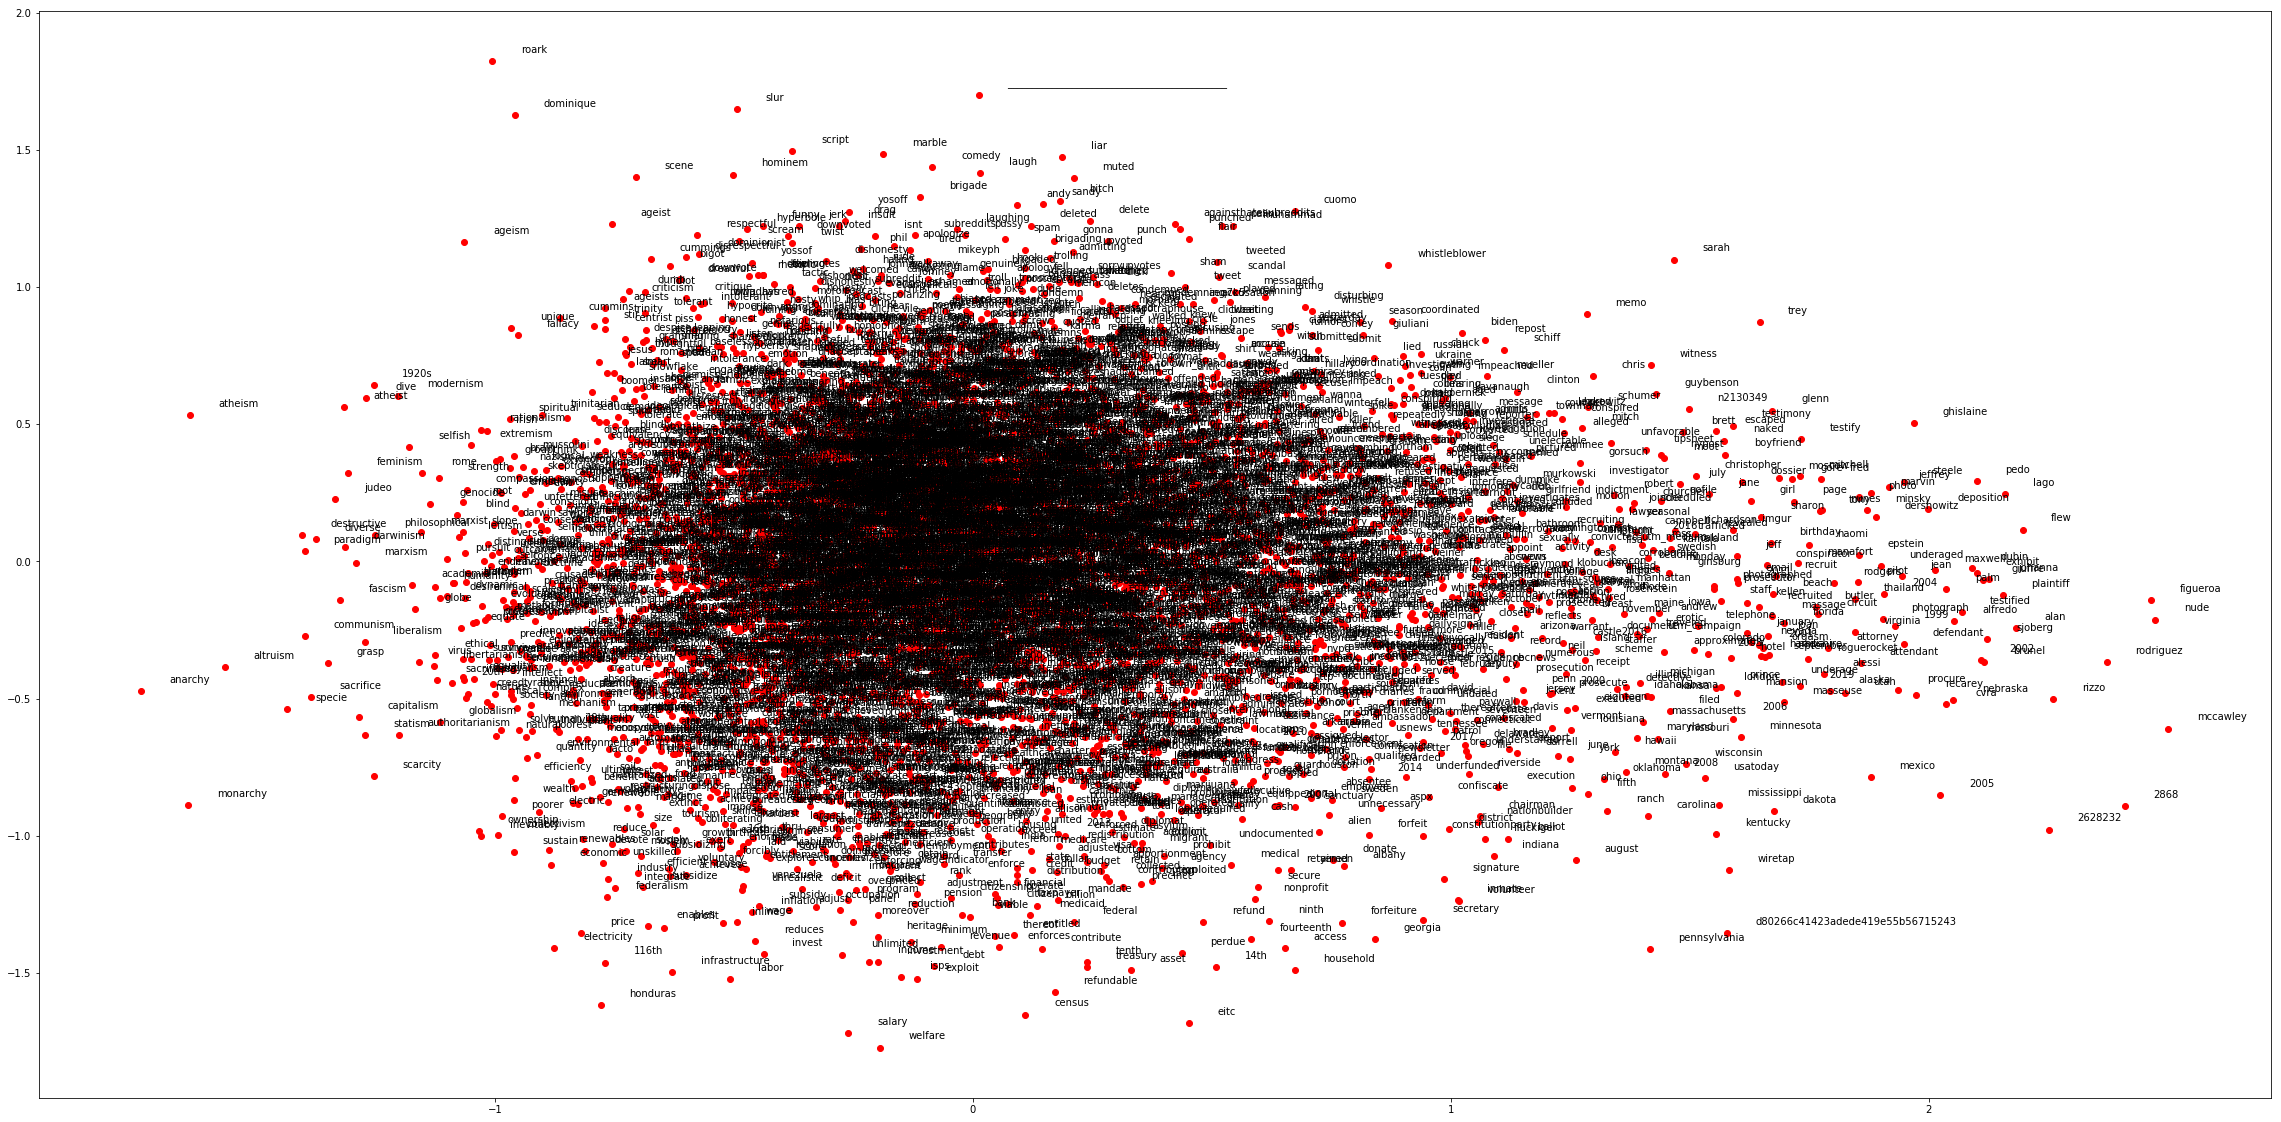

In [61]:
lista = []
for key,val in ft_model.wv.vocab.items():
    lista.append(key)

#random150 = random.choices(lista, k=150)

vec = [ft_model[i] for i in lista]

word_vectors = vec

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = lista

plt.figure(figsize=(40, 20))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')
    
#plt.savefig('rep.png')

- playing with similarities

In [62]:
concepts = ['immigration', 'muslim', 'environment', 'greta', 'democracy']
for i in concepts:
    print(i, ft_model.wv.most_similar(i, topn=10), '\n')

immigration [('migration', 0.9513953924179077), ('immigrant', 0.9152511358261108), ('migrant', 0.8267289400100708), ('illegals', 0.790860652923584), ('illegally', 0.7806598544120789), ('visa', 0.7539417743682861), ('illegal', 0.7406747341156006), ('entry', 0.7290827035903931), ('implemented', 0.7230931520462036), ('affirmative', 0.7207807898521423)] 

muslim [('israelite', 0.8712409138679504), ('israeli', 0.8545827865600586), ('syrian', 0.8274049162864685), ('palestinian', 0.8127405047416687), ('terrorism', 0.8065698146820068), ('israel', 0.8044979572296143), ('genocide', 0.8003566265106201), ('terrorist', 0.7958028316497803), ('hostile', 0.7946490049362183), ('islamic', 0.7901645302772522)] 

environment [('environmental', 0.9699369668960571), ('environmentalist', 0.9172149896621704), ('envy', 0.7578985691070557), ('plant', 0.7530851364135742), ('efficient', 0.7285019159317017), ('technology', 0.7159140706062317), ('energy', 0.7157546281814575), ('reactor', 0.7145167589187622), ('land

In [63]:
#ft_model.save('rep.bin')